In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# set file path for csv
final_df = "ProjectGuidelines/data-project-1/final_df.csv"
# file_2 = "../Resources/imdb_rating_data.csv"

In [4]:
# read in csv file to notebook
final_df = pd.read_csv(final_df, low_memory = False)
final_df.head()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79


In [5]:
# # Find number of movies in each year 1970-2010
indexYears = final_df[final_df['startYear'] < 1970 ].index
 
# Delete these row indexes from dataFrame
final_df.drop(indexYears, inplace=True)

indexMoreYears = final_df[final_df['startYear'] > 2010].index
final_df.drop(indexMoreYears, inplace=True)
final_df.head()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7665,15867,tt0031458,El hu??sped del sevillano,1970,86,Comedy,7.1,8
9811,19543,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,76547
10463,20650,tt0036606,"Another Time, Another Place",1983,118,"Drama,War",6.5,246
12060,23244,tt0039442,"Habla, mudita",1973,88,Drama,6.2,125
20727,37589,tt0054724,I Eat Your Skin,1971,92,Horror,3.5,1185


In [6]:
# Split up data into groups based on year released
year_group = final_df.groupby('startYear')
year_group.head()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7665,15867,tt0031458,El hu??sped del sevillano,1970,86,Comedy,7.1,8
9811,19543,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,76547
10463,20650,tt0036606,"Another Time, Another Place",1983,118,"Drama,War",6.5,246
12060,23244,tt0039442,"Habla, mudita",1973,88,Drama,6.2,125
20727,37589,tt0054724,I Eat Your Skin,1971,92,Horror,3.5,1185
...,...,...,...,...,...,...,...,...
67525,154486,tt0218140,Death and Taxis,2007,89,Drama,8.7,29
68721,160083,tt0230212,The Final Journey,2010,120,Drama,8.9,9
76923,190624,tt0289146,Darkness,2009,100,"Horror,Mystery,Thriller",4.6,159
78831,199255,tt0304876,Live Wire,2009,81,Comedy,5.4,79


In [7]:
years = final_df['startYear'].unique()
years

bins = [1970,1980,1990,2000,2010]
year_groups = ["1970-1980","1980-1990","1990-2000","2000-2010"]
final_df["Year group"] = pd.cut(final_df["startYear"], bins, labels = year_groups)
final_df.dropna()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Year group
9811,19543,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,76547,2000-2010
10463,20650,tt0036606,"Another Time, Another Place",1983,118,"Drama,War",6.5,246,1980-1990
12060,23244,tt0039442,"Habla, mudita",1973,88,Drama,6.2,125,1970-1980
20727,37589,tt0054724,I Eat Your Skin,1971,92,Horror,3.5,1185,1970-1980
23235,41843,tt0058950,"Auliban, the Seller of Rings",1973,95,"Comedy,Musical",7.0,121,1970-1980
...,...,...,...,...,...,...,...,...,...
100248,474772,tt0953478,Lilla sp??ket Laban,2006,45,"Animation,Family",6.3,63,2000-2010
100249,474773,tt0953483,Made in GDR - Alles ?ªber meine Freunde,2007,93,Documentary,7.4,5,2000-2010
100250,474785,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11,1980-1990
100251,474790,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442,2000-2010


In [8]:
# # Find number of movies in each year
no_released = year_group['primaryTitle'].count()
no_released

startYear
1970    1386
1971    1342
1972    1373
1973    1361
1974    1329
1975    1215
1976    1238
1977    1210
1978    1218
1979    1297
1980    1251
1981    1317
1982    1348
1983    1370
1984    1363
1985    1352
1986    1434
1987    1537
1988    1640
1989    1595
1990    1460
1991    1487
1992    1458
1993    1401
1994    1532
1995    1561
1996    1596
1997    1764
1998    1823
1999    1984
2000    2114
2001    2213
2002    2333
2003    2514
2004    2826
2005    3083
2006    3108
2007    1622
2008     684
2009     264
2010     134
Name: primaryTitle, dtype: int64

In [9]:
# # Find sum of ratings for each year
rating_sum = year_group['averageRating'].sum()
rating_sum

startYear
1970     8365.5
1971     8046.4
1972     8281.9
1973     8140.9
1974     8006.7
1975     7345.0
1976     7534.1
1977     7419.3
1978     7452.2
1979     7889.1
1980     7611.9
1981     8075.5
1982     8158.0
1983     8362.5
1984     8290.8
1985     8183.7
1986     8562.3
1987     9247.2
1988     9812.9
1989     9523.9
1990     8689.5
1991     8971.0
1992     8797.5
1993     8474.0
1994     9221.3
1995     9301.1
1996     9634.1
1997    10632.7
1998    11005.0
1999    11875.6
2000    12720.1
2001    13546.5
2002    14387.2
2003    15468.1
2004    17589.3
2005    19263.5
2006    19036.8
2007     9665.4
2008     3955.4
2009     1535.2
2010      783.5
Name: averageRating, dtype: float64

In [10]:
# # # # Find average rating of all movies in each year
avg_by_year = rating_sum / no_released
avg_by_year

startYear
1970    6.035714
1971    5.995827
1972    6.031974
1973    5.981558
1974    6.024605
1975    6.045267
1976    6.085703
1977    6.131653
1978    6.118391
1979    6.082575
1980    6.084652
1981    6.131739
1982    6.051929
1983    6.104015
1984    6.082759
1985    6.053033
1986    5.970921
1987    6.016396
1988    5.983476
1989    5.971097
1990    5.951712
1991    6.032952
1992    6.033951
1993    6.048537
1994    6.019125
1995    5.958424
1996    6.036404
1997    6.027608
1998    6.036753
1999    5.985685
2000    6.017077
2001    6.121329
2002    6.166824
2003    6.152784
2004    6.224098
2005    6.248297
2006    6.125097
2007    5.958940
2008    5.782749
2009    5.815152
2010    5.847015
dtype: float64

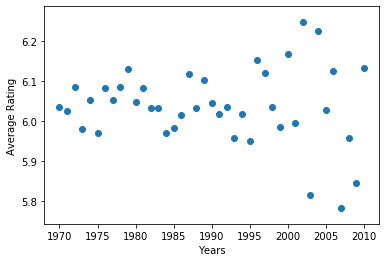

In [11]:
# Create scatter plot to compare average ratings by year
x_values = years
y_values = avg_by_year
plt.scatter(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Average Rating')
plt.show()

In [12]:
# year vs rating from 1970-1980, 80-90, 90-00, 00-10
#Creating bins
# bins = [1970,1980,1990,2000,2010]
# year_groups = ["1970-1980","1980-1990","1990-2000","2000-2010"]
# final_df["Year group"] = pd.cut(final_df["startYear"], bins, labels = year_groups)
# final_df.dropna()


In [13]:
# # Create equation of line to calculate predicted movie rating based on year
# slope, int, r, p, std_err = stats.linregress(x_values, y_values)
# # Plot the linear model on top of scatter plot 
# fit = slope * x_values + int
# x_values = years
# y_values = avg_by_year
# plt.scatter(x_values,y_values)
# plt.plot(x_values,fit,"--")
# plt.xlabel('Year')
# plt.ylabel('Average Rating')
# plt.show()

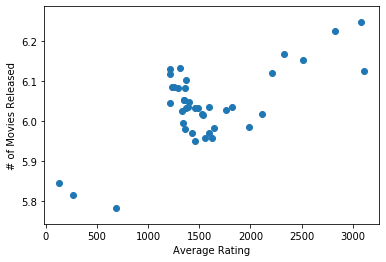

In [14]:
# Create scatter plot to compare average ratings by year
x_values = no_released
y_values = avg_by_year
plt.scatter(x_values, y_values)
plt.xlabel('Average Rating')
plt.ylabel('# of Movies Released')
plt.show()

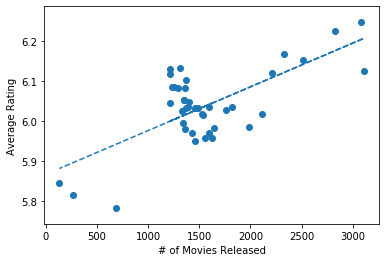

In [15]:
# Create equation of line to calculate predicted violent crime rate
no_slope, no_int, no_r, no_p, no_std_err = stats.linregress(x_values, y_values)
# Plot the linear model on top of scatter plot 
no_fit = no_slope * x_values + no_int
x_values = no_released
y_values = avg_by_year
plt.scatter(x_values,y_values)
plt.plot(x_values,no_fit,"--")
plt.xlabel('# of Movies Released')
plt.ylabel('Average Rating')
plt.show()

In [16]:
# # movies released vs average rating for year bins
#Creating bins
# bins = [1970,1980,1990,2000,2010]
# year_groups = ["1970-1980","1980-1990","1990-2000”,“2000-2010"]
# ranking_df["Year group”] = pd.cut(ranking_df[“startYear”], bins, labels=year_groups)
# ranking_df.dropna()